In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import cvxpy as cp
from numpy import linalg as LA
import pprint
from lap import lapjv
import copy
import sys

print(sys.getrecursionlimit())
sys.setrecursionlimit(50000)

n=20
ro = 0.8
a = 0.2
num_loop = 3000


3000


In [2]:
# Construct K
def K_Bernoulli(n,a):
    np.random.seed(3)
    K=np.identity(n)
    P=np.ones([n,n]) 
    K = P-K
    #print(K)
    for i in range(n):
        for j in range(i+1,n):
            K[i][j] = round(random.uniform(a,1-a),2)
            #K[i][j] = random.uniform(alpha,1-alpha)
            K[j][i]=K[i][j]        
    return K
     

# Generate A
def A_adj(K):
    n = len(K)
    B=np.identity(len(K))
    P=np.ones([n,n]) 
    #print(P)
    B= P-B
    #print(B)
    for i in range(len(B)):
        for j in range(i+1,len(B)):
            B[i][j] =random.uniform(0,1)
            if B[i][j] < K[i][j]:
                B[i][j] = 1
            else:
                B[i][j] = 0
            B[j][i] = B[i][j]
    A = B
    return A

# Generate B
def B_adj(ro,K,A):
    B = np.zeros([len(A),len(A)])
    for i in range(len(B)):
        for j in range(i+1,len(B)):
            B[i][j] =random.uniform(0,1)
            if B[i][j] < (1-ro)*K[i][j] + ro*A[i][j]:
                B[i][j] = 1
            else:
                B[i][j] = 0
            B[j][i] = B[i][j]
    return B
    
    
                
            
                
            


In [3]:
#Construct a n-degree permutation matrix 

def permu(N):
    E=np.identity(N)
    permutation = np.random.permutation(N)
    P=np.zeros([N,N]) #initialize the permutation matrix
     
    for i in range(0,N):
        P[i]=E[permutation[i]]
    
    
    return P.astype(int)



In [4]:
# Generate a random aj matrix for unweighted and undirected graph
def generate_aj_matrix(n):
    id = np.identity(n)
    ones_mat=np.ones((n, n)) 
    arr = ones_mat - id
    #print(arr)
    for i in range(n):
        for j in range(i+1,n):
            arr[i][j] = random.choice([0,1])
            arr[j][i] = arr[i][j]
    return arr

In [5]:
K= K_Bernoulli(n,a)
A = A_adj(K)
B_ori = B_adj(ro,K,A)
print("A:\n",A)
P_1 = np.identity(n)
print("P= \n",P_1)
B = np.matmul(P_1.T, np.matmul(B_ori,P_1))
print("B= \n",B)

print("original loss:",LA.norm(A@P_1-P_1@B,"fro"))

A:
 [[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1

In [6]:
def ret_permu_result(l,n):
    ret = np.zeros((n, n))
    for i in range(n):
        ret[i][l[i]] = 1
    #print(ret)
    return ret

In [7]:


one_arr = np.ones((n, 1))
initial = one_arr@one_arr.T / n

In [8]:
def FAQ(n,A,B,initial,eps,loop,num_loop,err,P_1):
    loop += 1
    
    gradient = 2*A.T@A@initial - 2*(A.T@initial@B + A@initial@B.T) +2*initial@B@B.T
    
        
    # Dropping terms independent of P
    x,y,c = lapjv(gradient)
    index_list = y
    Q = ret_permu_result(index_list,n)
    
    # Find alpha
    alpha = cp.Variable(1)
    #print(alpha.shape)(1-alpha)*
    P = (1-alpha)*initial+ alpha * Q
    objective = cp.Minimize((cp.norm(A@P-P@B, 'fro'))**2)
    constraints = [0<= alpha, alpha<= 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    P_new = (1-alpha.value[0])*initial + alpha.value[0]*Q
    error_compare = (LA.norm(A@P_new-P_new@B,"fro"))/(LA.norm(A,"fro"))
    err.append(error_compare)
    
    if loop>num_loop:
        
        e,r,t = lapjv(-P_new.T)
        
        P_result = ret_permu_result(r,n).T
        return [P_new,P_result,loop,err]

    if LA.norm(P_new-initial, 'fro') < eps:
        
        e,r,t = lapjv(-P_new.T)
        
        P_result = ret_permu_result(r,n).T
        
        return [P_new,P_result,loop,err]
    else:
        return FAQ(n,A,B,P_new,eps,loop,num_loop,err,P_1) 
    

In [9]:


result = FAQ(n,A,B,initial,10**(-9),0,num_loop,[],P_1)


In [10]:
n=10
one_arr = np.ones((n, 1))
initial = one_arr@one_arr.T / n

In [11]:

K= K_Bernoulli(n,a)
print(K)
A = A_adj(K)
B_ori = B_adj(ro,K,A)
P_1 = np.identity(n)
B = np.matmul(P_1.T, np.matmul(B_ori,P_1))


[[0.   0.5  0.76 0.78 0.66 0.58 0.2  0.47 0.57 0.38]
 [0.5  0.   0.3  0.49 0.25 0.76 0.71 0.77 0.74 0.79]
 [0.76 0.3  0.   0.55 0.36 0.63 0.8  0.6  0.28 0.64]
 [0.78 0.49 0.55 0.   0.27 0.25 0.5  0.37 0.3  0.75]
 [0.66 0.25 0.36 0.27 0.   0.27 0.56 0.33 0.67 0.63]
 [0.58 0.76 0.63 0.25 0.27 0.   0.37 0.44 0.49 0.54]
 [0.2  0.71 0.8  0.5  0.56 0.37 0.   0.45 0.73 0.58]
 [0.47 0.77 0.6  0.37 0.33 0.44 0.45 0.   0.48 0.66]
 [0.57 0.74 0.28 0.3  0.67 0.49 0.73 0.48 0.   0.5 ]
 [0.38 0.79 0.64 0.75 0.63 0.54 0.58 0.66 0.5  0.  ]]


In [12]:
result_2 = FAQ(n,A,B,initial,10**(-9),0,num_loop,[],P_1)
loop_2 = result_2[2]
error_list_2 = result_2[3]


In [13]:
n=20
one_arr = np.ones((n, 1))
initial = one_arr@one_arr.T / n
K= K_Bernoulli(n,a)
A = A_adj(K)
B_ori = B_adj(ro,K,A)
P_1 = np.identity(n)
B = np.matmul(P_1.T, np.matmul(B_ori,P_1))
result_3 = FAQ(n,A,B,initial,10**(-9),0,num_loop,[],P_1)
loop_3 = result_3[2]
error_list_3 = result_3[3]



In [14]:
n=30
one_arr = np.ones((n, 1))
initial = one_arr@one_arr.T / n
K= K_Bernoulli(n,a)
A = A_adj(K)
B_ori = B_adj(ro,K,A)
P_1 = np.identity(n)
B = np.matmul(P_1.T, np.matmul(B_ori,P_1))
result_4 = FAQ(n,A,B,initial,10**(-9),0,num_loop,[],P_1)
loop_4 = result_4[2]
error_list_4 = result_4[3]



In [20]:
error_list = result[3]
L = [i for i in range(1,result[2]+1)]
L_2 = [i for i in range(1,loop_2+1)]
L_3 = [i for i in range(1,loop_3+1)]
L_4 = [i for i in range(1,loop_4+1)]

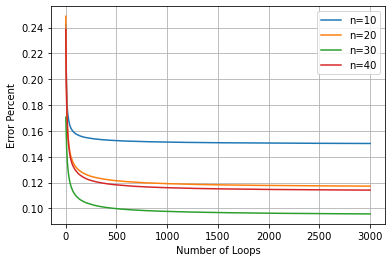

In [22]:

plt.plot(L_2, error_list_2,label="n=10")
plt.plot(L_3, error_list_3,label="n=20")
plt.plot(L_4, error_list_4,label="n=30")
plt.plot(L, error_list,label="n=40")


plt.xlabel(r'Number of Loops')
plt.ylabel('Error Percent')
plt.grid()
plt.legend()
